In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [2]:
def print_error_matrix(y_test,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    precision=  tp / (tp+fp)if (tp+fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    F1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

    print(f"Accuracy:     {accuracy:.4f}")
    print(f"F1:           {F1:.4f}")
    print(f"Precision:    {precision:.4f}")
    print(f"Sensitivity:  {sensitivity:.4f}")
    print(f"Specificity:  {specificity:.4f}")
    print(f"TP:           {tp}")
    print(f"FP:           {fp}")
    print(f"TN:           {tn}")
    print(f"FN:           {fn}")
    print("         Pred 0    Pred 1")
    print(f"True 0    {tn:4}     {fp:4}")
    print(f"True 1    {fn:4}     {tp:4}")

def plot_ROC(fpr,tpr,roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Średnia krzywa ROC (5-fold)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def test_model(model,X_test,y_test,THRESHOLD=0.9):
    y_probs = model.predict(X_test).ravel()  

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plot_ROC(fpr,tpr,roc_auc)

    y_pred = model.predict(X_test)
    y_pred = (y_pred > THRESHOLD).astype('int32')
    print(classification_report(y_test, y_pred))
    
    confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
    print_error_matrix(y_test,y_pred)

In [3]:
train=pd.read_csv("no_features_dataset_train.csv", header=None)
test=pd.read_csv("no_features_dataset_test.csv", header=None)


X_train = train.iloc[: ,1:].values
y_train = train.iloc[: ,0].values

X_test = test.iloc[: ,1:].values
y_test = test.iloc[: ,0].values

In [4]:
y_test = np.where(y_test > 1, 1, y_test)
y_train = np.where(y_train > 1, 1, y_train)

## DENSE

In [6]:
def custom_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

In [7]:
def custom_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1024, activation='relu'), 
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'), 
    layers.Dense(1, activation='sigmoid') 
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])


Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8021 - loss: 0.4616 - val_accuracy: 0.7971 - val_loss: 0.4726 - learning_rate: 0.0010
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8602 - loss: 0.3239 - val_accuracy: 0.7769 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8715 - loss: 0.2989 - val_accuracy: 0.7910 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8719 - loss: 0.2911 - val_accuracy: 0.7899 - val_loss: 0.5206 - learning_rate: 0.0010
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8750 - loss: 0.2831 - val_accuracy: 0.7700 - val_loss: 0.4969 - learning_rate: 0.0010
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8762 - loss: 0.2800 - val_accuracy: 0.7899 - val_loss: 0.4983 - learning_rate: 9.0484e-04
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8775 - loss: 0.273

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


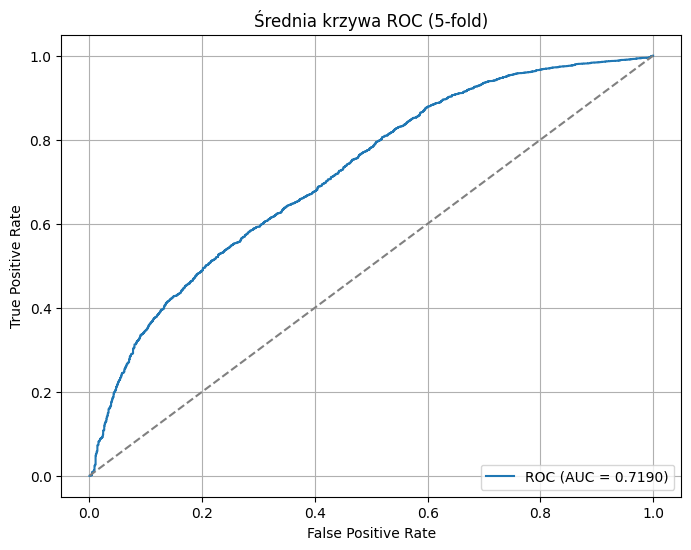

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.40      0.55      0.46      1565
           1       0.84      0.74      0.78      4952

    accuracy                           0.69      6517
   macro avg       0.62      0.64      0.62      6517
weighted avg       0.73      0.69      0.71      6517

Accuracy:     0.6917
F1:           0.7844
Precision:    0.8371
Sensitivity:  0.7379
Specificity:  0.5457
TP:           3654
FP:           711
TN:           854
FN:           1298
         Pred 0    Pred 1
True 0     854      711
True 1    1298     3654


In [ ]:
# model.save("dense_NN.keras")
test_model(model,X_test,y_test,THRESHOLD=0.7)

## CNN

In [18]:
cnn_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Reshape((X_train.shape[1], 1)), 
    layers.Conv1D(64, (3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Conv1D(32, (3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])



Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8943 - loss: 0.2488 - val_accuracy: 0.7846 - val_loss: 0.5782 - learning_rate: 0.0010
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8899 - loss: 0.2513 - val_accuracy: 0.7810 - val_loss: 0.5701 - learning_rate: 0.0010
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8945 - loss: 0.2458 - val_accuracy: 0.7362 - val_loss: 0.6494 - learning_rate: 0.0010
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8940 - loss: 0.2451 - val_accuracy: 0.7901 - val_loss: 0.6191 - learning_rate: 0.0010
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8957 - loss: 0.2440 - val_accuracy: 0.7692 - val_loss: 0.5502 - learning_rate: 0.0010
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8979 - loss: 0.2369 - val_accuracy: 0.7292 - val_loss: 0.6932 - learning_rate: 9.0484e-04
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8967 - loss: 0.240

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


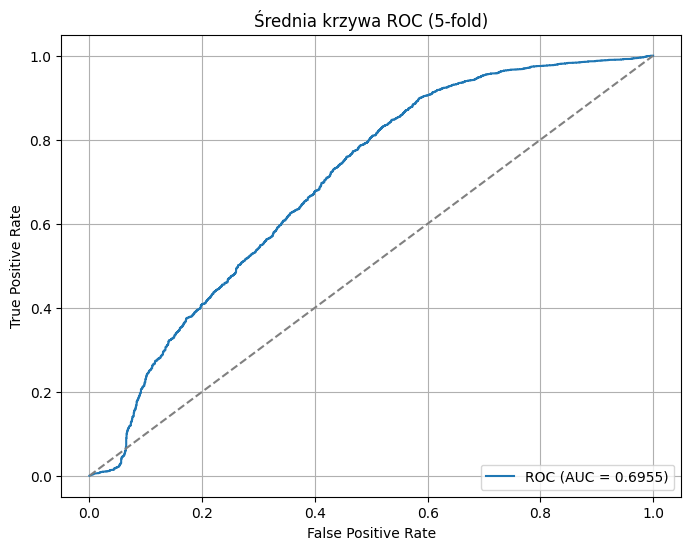

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.33      0.69      0.45      1565
           1       0.85      0.56      0.68      4952

    accuracy                           0.59      6517
   macro avg       0.59      0.62      0.56      6517
weighted avg       0.73      0.59      0.62      6517

Accuracy:     0.5909
F1:           0.6757
Precision:    0.8498
Sensitivity:  0.5608
Specificity:  0.6863
TP:           2777
FP:           491
TN:           1074
FN:           2175
         Pred 0    Pred 1
True 0    1074      491
True 1    2175     2777


In [24]:
test_model(model,X_test,y_test,THRESHOLD=0.9)

## LSTM

In [9]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Reshape((X_train.shape[1], 1)), 
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(1, activation='sigmoid') 
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])



Epoch 1/20
  5/507 ━━━━━━━━━━━━━━━━━━━━ 23:07 3s/step - accuracy: 0.7116 - loss: 0.6492

KeyboardInterrupt: 

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


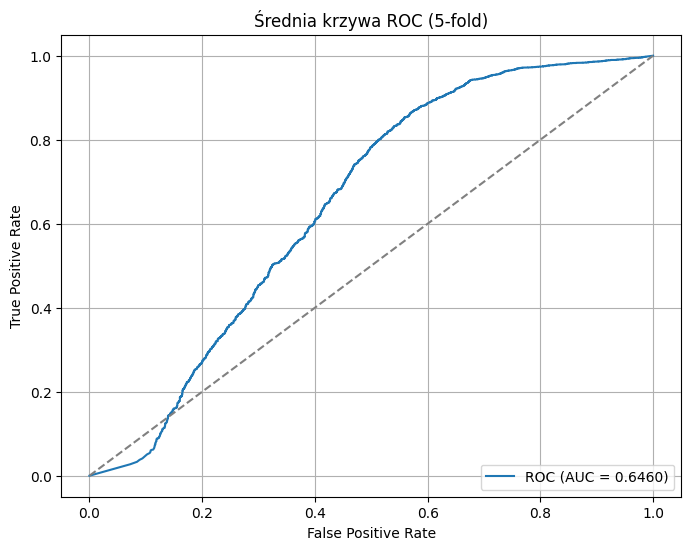

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.36      0.55      0.44      1565
           1       0.83      0.70      0.76      4952

    accuracy                           0.66      6517
   macro avg       0.60      0.62      0.60      6517
weighted avg       0.72      0.66      0.68      6517

Accuracy:     0.6601
F1:           0.7566
Precision:    0.8298
Sensitivity:  0.6953
Specificity:  0.5489
TP:           3443
FP:           706
TN:           859
FN:           1509
         Pred 0    Pred 1
True 0     859      706
True 1    1509     3443


In [ ]:
test_model(model,X_test,y_test,THRESHOLD=0.7)
# model.save("LSTM_CNN_NN.keras")

## CNN-LSTM

In [38]:
cnn_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Reshape((X_train.shape[1], 1)), 
    layers.Conv1D(64, (3), activation='relu'),
    layers.MaxPooling1D((2)),
    layers.Conv1D(32, (3), activation='relu'),
    layers.MaxPooling1D((2)),
    # layers.Flatten(),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])



Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9101 - loss: 0.2018 - val_accuracy: 0.7376 - val_loss: 1.6345 - learning_rate: 0.0010
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9129 - loss: 0.1989 - val_accuracy: 0.6775 - val_loss: 1.8897 - learning_rate: 0.0010
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9140 - loss: 0.1924 - val_accuracy: 0.6969 - val_loss: 2.0778 - learning_rate: 0.0010
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9123 - loss: 0.1937 - val_accuracy: 0.7161 - val_loss: 1.8481 - learning_rate: 0.0010
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9112 - loss: 0.1973 - val_accuracy: 0.6991 - val_loss: 2.0386 - learning_rate: 0.0010
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9136 - loss: 0.1911 - val_accuracy: 0.6649 - val_loss: 1.9574 - learning_rate: 9.0484e-04
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9125 - loss: 0.193

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


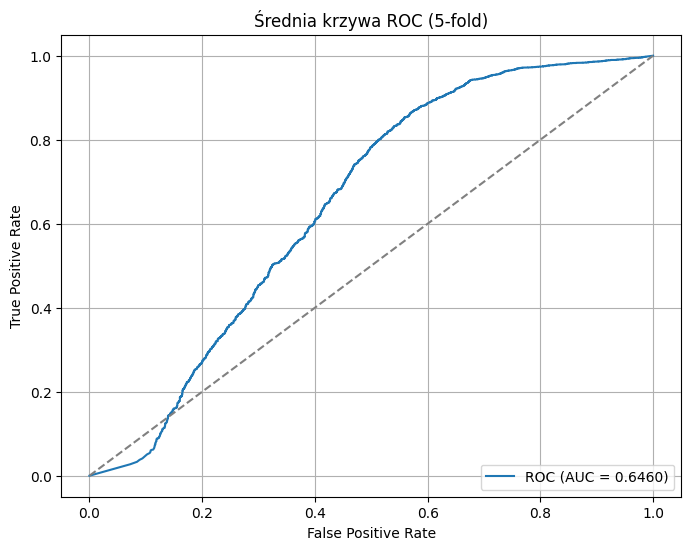

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.32      0.60      0.42      1565
           1       0.83      0.60      0.70      4952

    accuracy                           0.60      6517
   macro avg       0.58      0.60      0.56      6517
weighted avg       0.71      0.60      0.63      6517

Accuracy:     0.6026
F1:           0.6975
Precision:    0.8271
Sensitivity:  0.6030
Specificity:  0.6013
TP:           2986
FP:           624
TN:           941
FN:           1966
         Pred 0    Pred 1
True 0     941      624
True 1    1966     2986


In [ ]:
test_model(model,X_test,y_test,THRESHOLD=0.9)
# model.save("LSTM_CNN_NN.keras")